# Business Understanding

## Topic

How an e-commerce company can utilize customer's behavioral data to improve Customer Relationship Management (CRM)

## Problem Statement

Today CRM and Cohort Analysis is the must have knowledge for any Data Scientist or Data Analyst. The company uses CRM to improve customer service relationships and assist in customer retention and drive sales growth. Company would like to analyze and gather information about customer's behavior.

## Objectives

- Improve customer service relationships

- Assist in customer retention

- Drive sales growth

## Mission

- Analyze and gather information about customer's behavior

## About the Dataset

The dataset contains the information about customer's purchases across the United States. There are about 9800 customers and their purchases during the year period from 2015 to 2018.

## Features Description

Row ID:ID number row
Order ID:ID Order
Order Date:Order Date
Ship Date:Ship Date
Ship mode:Ship mode
Customer ID:Customer ID
Customer Name:Customer Name
Segment:Segment
Country:Country
City:City
Product Name:Product Name
Sales:Sales
Sub-Category: Sub-Category
Category:Category
Product ID:Product ID
Region:Region
Postal Code:Postal Code
State:State

## Dataset Source

dataset: customer-segmentation.csv

dataset description: feature-description

# Additional Information

Terminology:

- Cohort - group of people (users, individuals and etc.) who have a common characteristic(-s) during a period of time.

- Cohort Analysis - a subset of behavioral analytics that researches groups of people who have taken a common action during a selected period of time.

- Retention - the continued possession, use, or control something.

Type of cohorts as: 

- Time Cohorts (So called Retention)

- Behavior Cohorts (RFM, LFL and other variations of analysis)

- Size Cohorts (Clustering, Behavior Patterns Segmentation and etc.)

# Import

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime
from operator import attrgetter
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data Understanding

In [2]:
df_cek = pd.read_csv('customer-segmentation.csv')

In [3]:
df = pd.read_csv('customer-segmentation.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


- Row ID mirip index hanya saja dimulai dari 0. Sepertinya tidak diperlukan karena sudah terdapat Order ID sebagai Primary Key

- Order Date dan Ship Date berupa tanggal. Perlu dicek lagi tipe datanya. NOTED

In [4]:
df.shape

(9800, 18)

- Terdapat 9800 row dengan 18 kolom. Namun, kolom Row ID perlu didrop melihat pertimbangan sebelumnya. NOTED

- 9800 row butuh dicek duplicate values nya. NOTED

In [5]:
## Drop Column
df.drop(['Row ID'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


- Terdapat 2 fitur numerik dengan 15 fitur category.

- Order Date dan Ship Date seharusnya bertipe data datetime, perlu diubah. NOTED

- Postal Code terdapat missing value. Perlu dicek apakah bisa didrop atau perlu dipertimbangkan. NOTED

## Data Conversion

In [7]:
## Data Conversion
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

## Data Extraction

In [8]:
## Extract Order Date
df['year'] = df['Order Date'].dt.year.apply(str)
df['month'] = df['Order Date'].dt.month.apply(int)
df['year_month'] = df['Order Date'].dt.strftime('%Y-%m')
df['month_date'] = df['Order Date'].dt.strftime('%m-%d')

In [9]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,2017-08,08-11
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,2017-08,08-11
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,2017-12,12-06
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,2016-11,11-10
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,2016-11,11-10


In [10]:
df.describe()

,Postal Code,Sales,month
count,9789.000000,9800.000000,9800.000000
mean,55273.322403,230.769059,7.186122
std,32041.223413,626.651875,3.424108
min,1040.000000,0.444000,1.000000
25%,23223.000000,17.248000,4.000000
50%,58103.000000,54.490000,8.000000
75%,90008.000000,210.605000,10.000000
max,99301.000000,22638.480000,12.000000


- Berdasarkan summary statistik rata-rata sales 230.77 dengan median 54.49. Berarti data berdistribusi skew positive.

- Outliers perlu dicek melihat 75% dengan nilai Max, 25% dengan nilai min, dan 75% dengan 25%. NOTED

In [11]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,2017-08,08-11
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,2017-08,08-11
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,2017-12,12-06
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,2016-11,11-10
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,2016-11,11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017,5,2017-05,05-21
9796,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,12,2016-12,12-01
9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,12,2016-12,12-01
9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,12,2016-12,12-01


In [12]:
check_unique = ['Segment','Country','City','State','Region','Category','Sub-Category']
for i in check_unique:
    print(i)
    print(f"Unique Value {df[i].nunique()}")
    print(f"Values \n {df[i].unique()}",end = '\n\n')

Segment
Unique Value 3
Values 
 ['Consumer' 'Corporate' 'Home Office']

Country
Unique Value 1
Values 
 ['United States']

City
Unique Value 529
Values 
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 

In [13]:
pd.set_option("display.max_rows", None)
pd.DataFrame(df["City"].value_counts()).sort_index()

,City
Aberdeen,1
Abilene,1
Akron,20
Albuquerque,14
Alexandria,16
Allen,4
Allentown,7
Altoona,2
Amarillo,10
Anaheim,19


## Find Duplicated

In [14]:
## Find duplicates Data
df[df.duplicated(keep=False)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
3405,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,...,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015,4,2015-04,04-23
3406,US-2015-150119,2015-04-23,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,...,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2015,4,2015-04,04-23


## Drop Duplicate

In [15]:
df.drop(3406, axis = 0, inplace = True)

## Missing Value

In [16]:
## Check Null Values
df.isna().sum().sort_values(ascending=False)

Postal Code      11
Region            0
year_month        0
month             0
year              0
Sales             0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Order ID          0
Order Date        0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
month_date        0
dtype: int64

In [17]:
df[df.isnull().any(axis=1)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
2234,CA-2018-104066,2018-05-12,2018-10-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,...,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,2018,5,2018-05,05-12
5274,CA-2016-162887,2016-07-11,2016-09-11,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,...,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,2016,7,2016-07,07-11
8798,US-2017-150140,2017-06-04,2017-10-04,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,...,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,2017,6,2017-06,06-04
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,...,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2017,1,2017-01,01-23
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,...,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,2017,1,2017-01,01-23
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,...,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,2017,1,2017-01,01-23
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,...,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,2018,1,2018-01,01-19
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,...,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,2018,1,2018-01,01-19
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,...,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,2018,1,2018-01,01-19
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,...,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,2018,1,2018-01,01-19


Ada missing values pada postal code satu wilayah yang menyebabkan hilangnya opportunity pada wilayah tersebut jika dihapus. Setelah dicari di google terdapat 5 postal code pada wilayah tersebut.

In [18]:
df.query("City == 'Seattle' & State == 'Washington'")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
13,CA-2017-161389,2017-05-12,2017-10-12,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,...,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,2017,5,2017-05,05-12
117,CA-2016-110457,2016-02-03,2016-06-03,Standard Class,DK-13090,Dave Kipp,Consumer,United States,Seattle,Washington,...,West,FUR-TA-10001768,Furniture,Tables,Hon Racetrack Conference Tables,787.530,2016,2,2016-02,02-03
156,CA-2016-118948,2016-05-28,2016-03-06,Standard Class,NK-18490,Neil Knudson,Home Office,United States,Seattle,Washington,...,West,OFF-AR-10001547,Office Supplies,Art,Newell 311,6.630,2016,5,2016-05,05-28
157,CA-2015-104269,2015-01-03,2015-06-03,Second Class,DB-13060,Dave Brooks,Consumer,United States,Seattle,Washington,...,West,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,457.568,2015,1,2015-01,01-03
163,CA-2017-113817,2017-07-11,2017-11-11,Standard Class,MJ-17740,Max Jones,Consumer,United States,Seattle,Washington,...,West,OFF-BI-10004002,Office Supplies,Binders,Wilson Jones International Size A4 Ring Binders,27.680,2017,7,2017-07,07-11
414,CA-2018-142636,2018-03-11,2018-07-11,Standard Class,KC-16675,Kimberly Carter,Corporate,United States,Seattle,Washington,...,West,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,139.860,2018,3,2018-03,03-11
415,CA-2018-142636,2018-03-11,2018-07-11,Standard Class,KC-16675,Kimberly Carter,Corporate,United States,Seattle,Washington,...,West,FUR-CH-10001891,Furniture,Chairs,Global Deluxe Office Fabric Chairs,307.136,2018,3,2018-03,03-11
459,CA-2016-109638,2016-12-15,2016-12-22,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Seattle,Washington,...,West,OFF-AP-10002472,Office Supplies,Appliances,3M Office Air Cleaner,103.920,2016,12,2016-12,12-15
460,CA-2016-109638,2016-12-15,2016-12-22,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Seattle,Washington,...,West,TEC-AC-10004571,Technology,Accessories,Logitech G700s Rechargeable Gaming Mouse,899.910,2016,12,2016-12,12-15
461,CA-2016-109638,2016-12-15,2016-12-22,Standard Class,JH-15985,Joseph Holt,Consumer,United States,Seattle,Washington,...,West,OFF-BI-10001098,Office Supplies,Binders,Acco D-Ring Binder w/DublLock,51.312,2016,12,2016-12,12-15


## Drop Postal Code

In [19]:
df.drop(['Postal Code'], axis =1, inplace = True)

# EDA

## Coba Coba Customer Profile

In [20]:
df['Customer ID'].value_counts().sort_values(ascending=False)

WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
SV-20365    32
CK-12205    32
JD-15895    32
AP-10915    31
ZC-21910    31
EP-13915    31
LC-16870    30
BM-11650    29
KL-16645    29
Dp-13240    29
GT-14710    29
CL-12565    28
CS-12250    28
KM-16720    28
KD-16495    28
XP-21865    28
BF-11170    27
EH-13765    27
DK-12835    27
SC-20725    26
LA-16780    26
PG-18820    26
SV-20785    25
CK-12595    25
AS-10090    25
RP-19390    25
PK-19075    25
SH-19975    24
GG-14650    24
MS-17365    24
SP-20620    24
RL-19615    24
JA-15970    24
SJ-20125    24
DR-12880    24
BH-11710    24
SP-20860    24
AH-10690    23
RW-19540    23
LC-16885    23
LB-16795    23
RB-19465    23
DK-13375    23
KB-16585    23
JE-15745    23
NS-18640    23
MH-18115    22
CS-11950    22
LS-16975    22
CB-12025    22
RA-19915    22
KL-16555    22
EA-14035    22
AM-10705    22
ME-17320    22
PO-18850    22
KB-16315    22
CS-12355    22
GA-14725    22
SC-20095    22
NW-18400    22
JE-15715    22
CC-12220  

- Ada 793 Customer dengan transaksi terbanyak 35 dari satu customer

- Dari 35 pembelian tersebut apa yang bisa didapat?. NOTED

In [21]:
df.groupby('Customer ID', as_index=False)\
    .agg(count=('Customer ID','count'), \
        sales_sum=('Sales','sum'))\
        .sort_values(by=['count', 'sales_sum'], ascending=False)
   

,Customer ID,count,sales_sum
787,WB-21850,35,6129.7100
606,PP-18955,34,7252.6080
482,MA-17560,34,4299.1610
387,JL-15835,33,9576.3430
720,SV-20365,32,11470.9500
349,JD-15895,32,7610.8640
147,CK-12205,32,3154.8550
791,ZC-21910,31,8025.7070
275,EP-13915,31,5478.0608
44,AP-10915,31,3323.5560


- Dari tingkat Sales customer dengan transaksi terbanyak bukan sales yang paling tinggi.

In [22]:
df.nlargest(10, 'Sales')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date
2697,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480,2015,3,2015-03,03-18
6826,CA-2017-118689,2017-02-10,2017-09-10,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,2017,2,2017-02,02-10
8153,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,2018,3,2018-03,03-23
2623,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,2018,10,2018-10,10-22
4190,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,2018,11,2018-11,11-17
9039,CA-2017-117121,2017-12-17,2017-12-21,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,2017,12,2017-12,12-17
4098,CA-2015-116904,2015-09-23,2015-09-28,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,2015,9,2015-09,09-23
4277,US-2017-107440,2017-04-16,2017-04-20,Standard Class,BS-11365,Bill Shonely,Corporate,United States,Lakewood,New Jersey,East,TEC-MA-10001047,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, Magenta",9099.930,2017,4,2017-04,04-16
8488,CA-2017-158841,2017-02-02,2017-04-02,Second Class,SE-20110,Sanjit Engle,Consumer,United States,Arlington,Virginia,South,TEC-MA-10001127,Technology,Machines,HP Designjet T520 Inkjet Large Format Printer ...,8749.950,2017,2,2017-02,02-02
6425,CA-2017-143714,2017-05-23,2017-05-27,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,Pennsylvania,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,2017,5,2017-05,05-23


In [23]:
temp1 = df[df['Customer ID'] == 'WB-21850']
temp1 = pd.DataFrame(temp1[['City', 'Category', 'Sub-Category','year_month', 'Ship Mode']].value_counts())
temp1.reset_index().sort_values('City')

,City,Category,Sub-Category,year_month,Ship Mode,0
0,Anaheim,Office Supplies,Binders,2017-11,Same Day,4
28,Anaheim,Office Supplies,Art,2017-11,Same Day,1
2,Anaheim,Furniture,Chairs,2017-11,Same Day,1
27,Anaheim,Office Supplies,Paper,2017-11,Same Day,1
26,Anaheim,Office Supplies,Storage,2017-11,Same Day,1
25,Anaheim,Technology,Accessories,2017-11,Same Day,1
17,Anaheim,Furniture,Tables,2017-11,Same Day,1
29,Anaheim,Office Supplies,Appliances,2017-11,Same Day,1
24,Concord,Furniture,Furnishings,2015-12,Standard Class,1
23,Grand Prairie,Office Supplies,Appliances,2015-12,Standard Class,1


In [24]:
temp1 = df[df['Customer ID'] == 'WB-21850']
temp1[['City', 'year_month', 'Ship Mode']].value_counts()

City           year_month  Ship Mode     
Anaheim        2017-11     Same Day          11
Los Angeles    2015-04     Standard Class     5
               2018-06     First Class        4
New York City  2017-01     Standard Class     3
Philadelphia   2016-11     Standard Class     3
Redmond        2016-10     Standard Class     3
Grand Prairie  2015-12     Standard Class     2
Philadelphia   2018-10     First Class        2
Concord        2015-12     Standard Class     1
Urbandale      2018-11     Standard Class     1
dtype: int64

In [25]:
df[df['Product Name'] == 'Staple envelope'][['Customer ID', 'City']].value_counts()

Customer ID  City         
AG-10900     Chicago          1
NW-18400     Philadelphia     1
KH-16360     Houston          1
KN-16705     New York City    1
LF-17185     New York City    1
LS-16945     San Francisco    1
LS-16975     Dallas           1
LS-17230     Grand Prairie    1
MB-18085     Springfield      1
MC-17425     New York City    1
NF-18385     Decatur          1
PB-19150     Miami            1
JP-15520     Port Orange      1
PW-19240     Wilmington       1
RA-19885     Columbus         1
             San Francisco    1
RD-19900     Carlsbad         1
RW-19540     Brentwood        1
SC-20305     San Jose         1
SH-19975     Pearland         1
SM-20005     Scottsdale       1
SO-20335     Greeley          1
JW-16075     Philadelphia     1
JK-15325     Atlantic City    1
AH-10030     Troy             1
DB-13555     Newark           1
AS-10090     Springfield      1
BD-11500     Newport News     1
BD-11725     Newark           1
BM-11650     Ann Arbor        1
CK-12205     

In [26]:
df['City'].value_counts()

New York City        891
Los Angeles          728
Philadelphia         532
San Francisco        500
Seattle              426
Houston              374
Chicago              308
Columbus             220
San Diego            170
Springfield          161
Dallas               156
Jacksonville         125
Detroit              115
Newark                92
Jackson               82
Richmond              81
Columbia              81
Aurora                68
Phoenix               63
Arlington             60
San Antonio           59
Miami                 56
Louisville            54
Rochester             53
Long Beach            52
Henderson             51
Charlotte             51
Lakewood              48
Lancaster             46
Denver                44
Lawrence              44
Baltimore             43
Pasadena              42
Fairfield             42
San Jose              42
Fayetteville          41
Milwaukee             40
Salem                 40
Atlanta               39
Austin                39


## Univariate Analysis

### Sales by Year

In [27]:
temp = df.groupby('year')['Sales'].sum().reset_index().sort_values('year',ascending=True)
fig = px.bar(temp, x='year', y='Sales', text_auto=True, title="Total Sales")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Sales by Year by Segment

In [28]:
temp = df.groupby(['Segment','year'])['Sales'].sum().reset_index().sort_values('year',ascending=True)
fig = px.bar(temp, x = 'year', y = 'Sales', facet_col='Segment', text_auto=True,title="Total Sales by Segment")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Sales by Year by Category

In [29]:
temp = df.groupby(['Category','year'])['Sales'].sum().reset_index().sort_values('year',ascending=True)
fig = px.bar(temp, x = 'year', y = 'Sales', facet_col='Category', text_auto=True,title="Total Sales by Category")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Sales by Segment

In [30]:
temp = df.groupby('Segment')['Sales'].sum().reset_index().sort_values('Segment',ascending=True)
fig = px.bar(temp, x='Segment', y='Sales', text_auto=True, title="Total Sales by Segment")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Unique Customer by Segment

In [31]:
cs_consumer = df.query("Segment == 'Consumer'")['Customer ID'].nunique()
cs_corporate = df.query("Segment == 'Corporate'")['Customer ID'].nunique()
cs_home_office = df.query("Segment == 'Home Office'")['Customer ID'].nunique()

temp = pd.DataFrame({'Segment':['Consumer','Corporate','Home Office'], 'Customer':[cs_consumer,cs_corporate,cs_home_office]})
# temp = df.groupby(['Segment'])['CustomerID'].count().reset_index().sort_values('Sales',ascending=False)
fig = px.bar(temp, x = 'Segment',y = 'Customer', text_auto=True,title="Total Customers by Segment")

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Transaction by Segment

In [32]:
cs_consumer = df.query("Segment == 'Consumer'")['Order ID'].nunique()
cs_corporate = df.query("Segment == 'Corporate'")['Order ID'].nunique()
cs_home_office = df.query("Segment == 'Home Office'")['Order ID'].nunique()

temp = pd.DataFrame({'Segment':['Consumer','Corporate','Home Office'], 'Customer':[cs_consumer,cs_corporate,cs_home_office]})
fig = px.bar(temp, x = 'Segment',y = 'Customer', text_auto=True,title="Total Orders by Segment")

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Transaction by Year by Segment

In [33]:
temp = df.groupby(['Segment','year'])['Order ID'].nunique().reset_index().sort_values('Segment',ascending=True)
temp
fig = px.bar(temp, x = 'year', y = 'Order ID', facet_col='Segment', text_auto=True,title="Total Transaction by Segment")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Basket Size by Segment by Year

In [34]:
temp = df.groupby(['Segment','year'], as_index=False)\
    .agg(transaction=('Order ID','nunique'), \
        sales_sum=('Sales','sum'))\
        .sort_values(by=['Segment','year'], ascending=True)
temp['Basket Size'] = temp['sales_sum']/temp['transaction']
fig = px.bar(temp, x = 'year', y = 'Basket Size', facet_col='Segment', text_auto=True, title="Basket Size")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Sales by Category

In [35]:
temp = df.groupby('Category')['Sales'].sum().reset_index().sort_values('Sales',ascending=True)
fig = px.bar(temp, x='Category', y='Sales', text_auto=True, title="Total Sales by Category")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Unique Customer by Category

In [36]:
cs_technology = df.query("Category == 'Technology'")['Customer ID'].nunique()
cs_furniture = df.query("Category == 'Furniture'")['Customer ID'].nunique()
cs_office_supplies = df.query("Category == 'Office Supplies'")['Customer ID'].nunique()

temp = pd.DataFrame({'Category':['Technology','Furniture','Office Supplies'], 'Customer':[cs_technology,cs_furniture,cs_office_supplies]})
# temp = df.groupby(['Segment'])['CustomerID'].count().reset_index().sort_values('Sales',ascending=False)
fig = px.bar(temp, x = 'Category',y = 'Customer', text_auto=True,title="Total Customers by Category")

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Transaction by Category

In [37]:
cs_technology = df.query("Category == 'Technology'")['Order ID'].nunique()
cs_furniture = df.query("Category == 'Furniture'")['Order ID'].nunique()
cs_office_supplies = df.query("Category == 'Office Supplies'")['Order ID'].nunique()

temp = pd.DataFrame({'Category':['Technology','Furniture','Office Supplies'], 'Order':[cs_technology,cs_furniture,cs_office_supplies]})
# temp = df.groupby(['Segment'])['CustomerID'].count().reset_index().sort_values('Sales',ascending=False)
fig = px.bar(temp, x = 'Category',y = 'Order', text_auto=True,title="Total Order by Category")

fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Transaction by Year by Category

In [38]:
temp = df.groupby(['Category','year'])['Order ID'].nunique().reset_index().sort_values('Category',ascending=True)
temp
fig = px.bar(temp, x = 'year', y = 'Order ID', facet_col='Category', text_auto=True,title="Total Transaction by Category")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Basket Size Category by Year

In [47]:
temp = df.groupby(['Category','year'], as_index=False)\
    .agg(transaction=('Order ID','nunique'), \
        sales_sum=('Sales','sum'))\
        .sort_values(by=['Category','year'], ascending=True)
temp['Basket Size'] = temp['sales_sum']/temp['transaction']
fig = px.bar(temp, x = 'year', y = 'Basket Size', facet_col='Category', text_auto=True, title="Basket Size")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

### Top SKU Transaction

In [39]:
top_sku = df.groupby(['Product Name','Category'], as_index=False)\
    .agg(transaction=('Product Name','count'), \
        sales_sum=('Sales','sum'))\
        .sort_values(by=['transaction','sales_sum'], ascending=False)
top_sku
   

,Product Name,Category,transaction,sales_sum
1492,Staple envelope,Office Supplies,47,1675.6520
1498,Staples,Office Supplies,46,755.4700
537,Easy-staple paper,Office Supplies,44,2414.1560
259,Avery Non-Stick Binders,Office Supplies,20,217.3160
1499,Staples in misc. colors,Office Supplies,18,459.6600
1495,Staple remover,Office Supplies,18,263.0880
941,KI Adjustable-Height Table,Furniture,17,4466.6610
1510,Storex Dura Pro Binders,Office Supplies,17,278.5860
1496,Staple-based wall hangings,Furniture,16,422.2880
1449,"Situations Contoured Folding Chairs, 4/Set",Furniture,15,3641.2740


In [40]:
df.groupby(['Product Name','Category'], as_index=False)\
    .agg(transaction=('Product Name','count'), \
        sales_sum=('Sales','sum'))\
        .sort_values(by=['sales_sum','transaction'], ascending=False)
   

,Product Name,Category,transaction,sales_sum
404,Canon imageCLASS 2200 Advanced Copier,Technology,5,61599.8240
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,10,27453.3840
444,Cisco TelePresence System EX90 Videoconferenci...,Technology,1,22638.4800
785,HON 5400 Series Task Chairs for Big and Tall,Furniture,8,21870.5760
685,GBC DocuBind TL300 Electric Binding System,Office Supplies,11,19823.4790
687,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,9,19024.5000
804,Hewlett Packard LaserJet 3310 Copier,Technology,8,18839.6860
786,HP Designjet T520 Inkjet Large Format Printer ...,Technology,3,18374.8950
682,GBC DocuBind P400 Electric Binding System,Office Supplies,6,17965.0680
812,High Speed Automatic Electric Letter Opener,Office Supplies,3,17030.3120


## Bivariate Analysis

### Sales by Category and Segment

In [41]:
temp = df.groupby(['Segment','Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
px.bar(temp, x = 'Category', y = 'Sales', facet_col='Segment', width=950, height=500)

### Sales by Year and Category

In [42]:
temp = df.groupby(['year','Category'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
px.bar(temp, x = 'year',y = 'Sales', facet_col = 'Category')

### Sales by Region and Ship Mode

In [43]:
temp = df.groupby(['Region','Ship Mode'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
px.bar(temp, x = 'Ship Mode',y = 'Sales', facet_col = 'Region')

In [44]:
df.query("Segment == 'Consumer'")['Customer ID'].nunique()

409

## Cohort Analysis

In [45]:
df['order_month'] = df['Order Date'].dt.to_period('M')
df['cohort'] = df.groupby('Customer ID')['Order Date'] \
                 .transform('min') \
                 .dt.strftime('%Y-%m')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,year,month,year_month,month_date,order_month,cohort
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,2017-08,08-11,2017-08,2016-10
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,2017-08,08-11,2017-08,2016-10
2,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,2017-12,12-06,2017-12,2017-09
3,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,2016-11,11-10,2016-11,2016-04
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,2016-11,11-10,2016-11,2016-04


In [46]:
df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
df_cohort.rename(columns={'Order Date' : 'Order_Date'},inplace=True)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/arrays/datetimelike.py:1108: PerformanceWarning:

Adding/subtracting object-dtype array to PeriodArray not vectorized



TypeError: unsupported operand type(s) for -: 'Period' and 'str'

In [ ]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')

In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

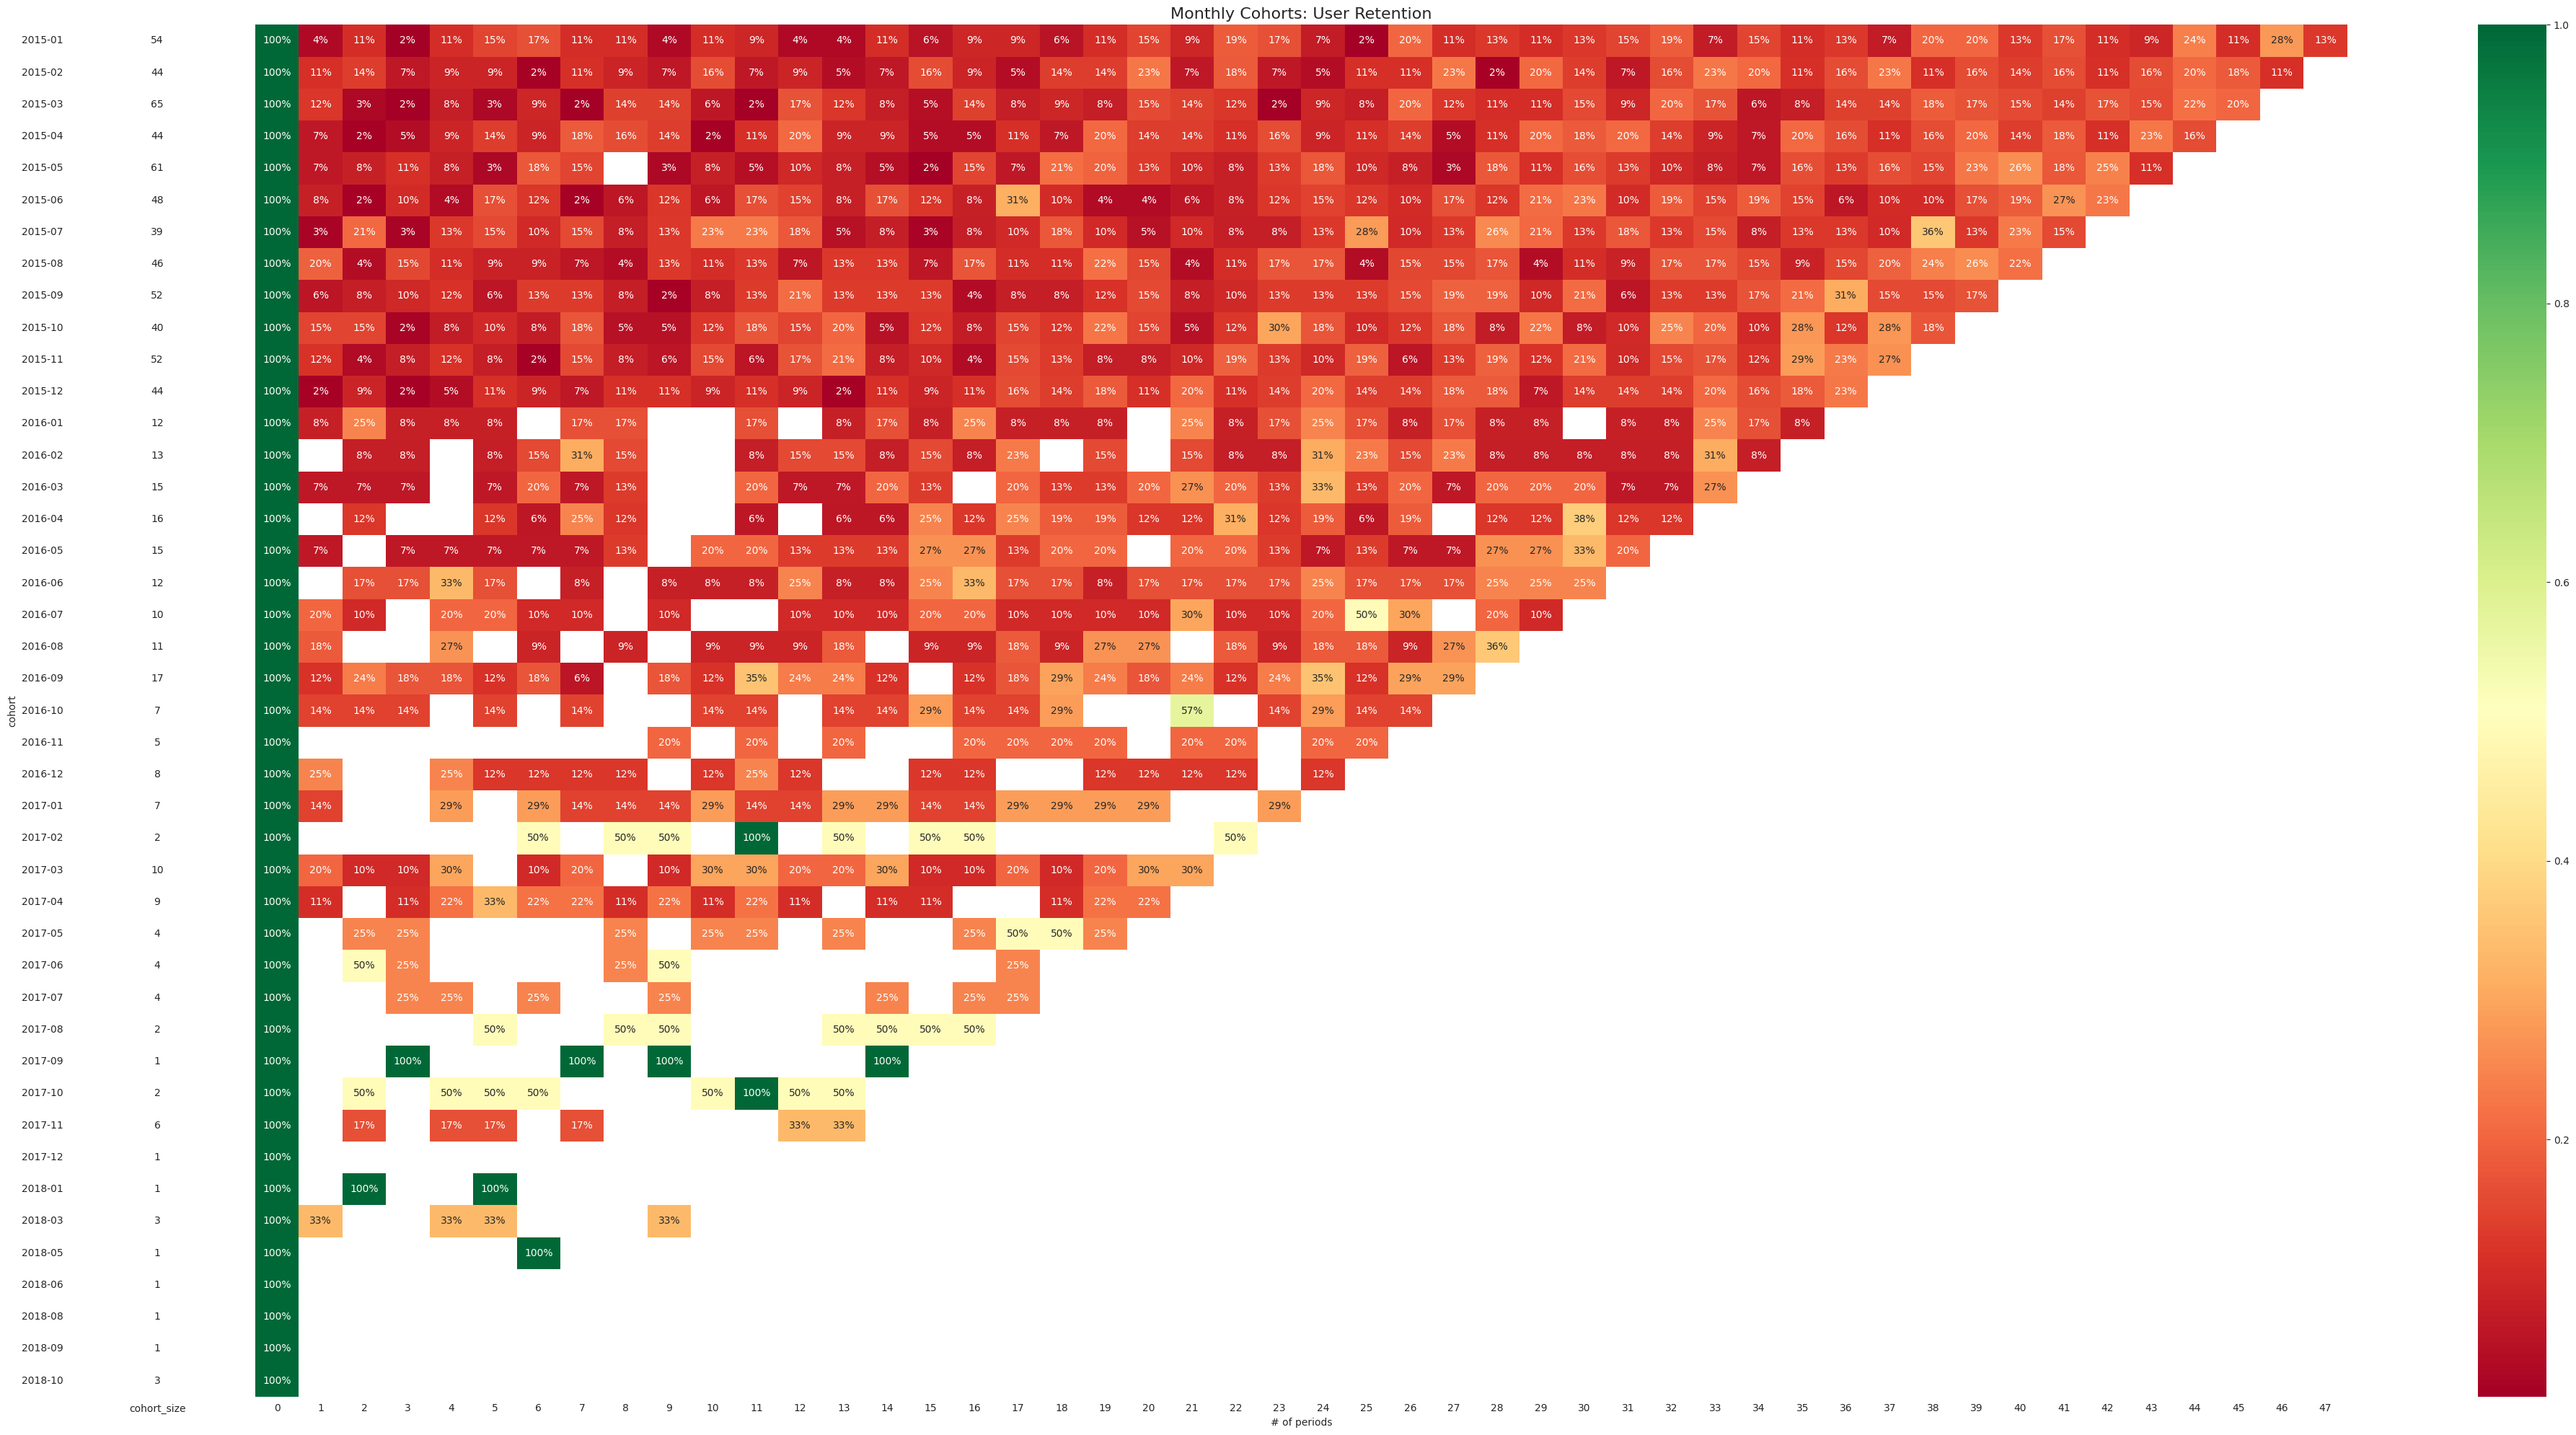

In [ ]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(40, 20), sharey=True, gridspec_kw={'width_ratios': [1, 15]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [ ]:
df_cohort2 = df.groupby(['cohort']) \
              .agg(n_customers=('Customer ID', 'nunique')) \
              .reset_index(drop=False)
fig = px.bar(df_cohort2, x='cohort', y='n_customers', text_auto=True,title="Customer Cohort")
fig.update_layout({
    'plot_bgcolor': 'rgba(0, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

# RFM

Behavioral segmentation by 3 important features:

Recency — number of days since the last purchase
Frequency — number of transactions made over a given period
Monetary — amount spent over a given period of time

It is a method used to determine customer value by looking at three dimensions:

Recency: when is the last time the user takes an action (e.g., login, place an order)?
Frequency: how many times does the user take this action?
Monetary value: what is the sum of monetary value from this user throughout his/her lifetime?


In [ ]:
df_recency = df.groupby(by='Customer Name',
                        as_index=False)['Order Date'].max()
df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,Aaron Bergman,2017-10-11,445
1,Aaron Hawkins,2018-12-18,12
2,Aaron Smayling,2018-04-09,265
3,Adam Bellavance,2018-09-16,105
4,Adam Hart,2018-11-26,34


In [ ]:
df_frequency = df.drop_duplicates().groupby(
    by=['Customer Name'], as_index=False)['Order Date'].count()
df_frequency.columns = ['CustomerName', 'Frequency']
df_frequency.head()

,CustomerName,Frequency
0,Aaron Bergman,6
1,Aaron Hawkins,11
2,Aaron Smayling,10
3,Adam Bellavance,18
4,Adam Hart,20


In [ ]:
df_monetary = df.groupby(by='Customer Name', as_index=False)['Sales'].sum()
df_monetary.columns = ['CustomerName', 'Monetary']
df_monetary.head()

,CustomerName,Monetary
0,Aaron Bergman,886.156
1,Aaron Hawkins,1744.700
2,Aaron Smayling,3050.692
3,Adam Bellavance,7755.620
4,Adam Hart,3250.337


In [ ]:
rf_df = df_recency.merge(df_frequency, on='CustomerName')
rfm_df = rf_df.merge(df_monetary, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Aaron Bergman,445,6,886.156
1,Aaron Hawkins,12,11,1744.700
2,Aaron Smayling,265,10,3050.692
3,Adam Bellavance,105,18,7755.620
4,Adam Hart,34,20,3250.337


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
0,Aaron Bergman,445,6,886.156,67.5,107.0,147.0
1,Aaron Hawkins,12,11,1744.700,716.5,375.5,326.0
2,Aaron Smayling,265,10,3050.692,164.0,316.5,523.0
3,Adam Bellavance,105,18,7755.620,369.0,652.5,753.0
4,Adam Hart,34,20,3250.337,624.0,700.5,555.0


In [ ]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=True, method='dense')
rfm_df.sort_values(by='Recency', ascending=True)

,CustomerName,Recency,Frequency,Monetary,R_rank,F_rank,M_rank
589,Patrick O'Donnell,0,13,2493.2140,1.0,470.5,445.0
370,Jill Matthias,0,7,303.9480,1.0,152.5,46.0
263,Erica Bern,0,6,1643.2550,1.0,107.0,304.0
160,Chuck Clark,0,19,2870.0500,1.0,677.0,503.0
438,Ken Brennan,1,9,983.9220,2.0,255.5,176.0
521,Michael Chen,1,14,3805.7140,2.0,521.5,605.0
342,James Galang,1,18,6366.3920,2.0,652.5,727.0
422,Katherine Hughes,1,14,3100.6120,2.0,521.5,532.0
116,Bruce Stewart,1,14,2562.3820,2.0,521.5,457.0
78,Ben Peterman,1,18,3675.8610,2.0,652.5,596.0


- method pada rank berdasarkan apa? dan dipertimbangkan dengan apa?

- rank recency, frekuensi, dan monetary berdasarkan apa? 

- (rencency makin baru  rank makin tinggi atau sebaliknya?)

- (frekuensi makin banyak rank makin tinggi atau sebaliknya?)

- (monetary makin banyak rangk makin tinggi atau sebaliknya?)

In [ ]:
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Aaron Bergman,445,6,886.156,81.230769,13.493064,13.493064
1,Aaron Hawkins,12,11,1744.700,4.000000,47.351828,47.351828
2,Aaron Smayling,265,10,3050.692,61.230769,39.911728,39.911728
3,Adam Bellavance,105,18,7755.620,29.230769,82.282472,82.282472
4,Adam Hart,34,20,3250.337,10.153846,88.335435,88.335435


- proporsi monetary lebih besar karena lebih mementingkan sisi monetary daripada recency dan frekuensi

- frekuensi dan recency proporsi lebih kecil karena dari cohort terlihat frekuensi pembelian customer tidak terlalu berulang

- recency dan frekuensi dilihat dari mana yang paling banyak dari yang terakhir transaksi atau banyaknya frekuensi

In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Aaron Bergman,1.18
1,Aaron Hawkins,2.04
2,Aaron Smayling,2.16
3,Adam Bellavance,3.72
4,Adam Hart,3.83
5,Adam Shillingsburg,4.32
6,Adrian Barton,3.85


In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName','Recency','Frequency','Monetary','RFM_Score', 'Customer_segment']].head(20)

,CustomerName,Recency,Frequency,Monetary,RFM_Score,Customer_segment
0,Aaron Bergman,445,6,886.16,1.18,Lost Customers
1,Aaron Hawkins,12,11,1744.70,2.04,Low Value Customers
2,Aaron Smayling,265,10,3050.69,2.16,Low Value Customers
3,Adam Bellavance,105,18,7755.62,3.72,Medium Value Customer
4,Adam Hart,34,20,3250.34,3.83,Medium Value Customer
5,Adam Shillingsburg,105,25,3255.31,4.32,High value Customer
6,Adrian Barton,41,20,14473.57,3.85,Medium Value Customer
7,Adrian Hane,60,16,1735.51,3.36,Medium Value Customer
8,Adrian Shami,41,3,58.82,0.23,Lost Customers
9,Aimee Bixby,41,12,966.71,2.36,Low Value Customers


- lost customers tuh bagaimana? dan customer yg lain itu bagaimana?

- Pendekatan strategi untuk tiap segment apa?

# CEK and RICEK

In [ ]:
df_cek.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
df_cek[df_cek['Postal Code']== 2148]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2393,2394,CA-2017-128111,17/03/2017,23/03/2017,Standard Class,CS-12355,Christine Sundaresam,Consumer,United States,Malden,Massachusetts,2148.0,East,OFF-AR-10000588,Office Supplies,Art,Newell 345,39.68
2543,2544,US-2017-114174,08/09/2017,14/09/2017,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Malden,Massachusetts,2148.0,East,FUR-BO-10003450,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",173.94
2544,2545,US-2017-114174,08/09/2017,14/09/2017,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Malden,Massachusetts,2148.0,East,OFF-LA-10000248,Office Supplies,Labels,Avery 52,14.76


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9cba59f0-8c25-4b22-a603-ac36020738ca' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>